title: "Data visualization lab"

author: "Shahryar Noei"

date: "Mar 12, 2025"

topic: STILL DATA CLEANING

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.2f}".format)
import warnings
warnings.filterwarnings('ignore')
np.random.seed(4561)

## Lord of the Rings!

Here is a practical example on some untidy data created from [this data from the Lord of the Rings Trilogy](https://github.com/jennybc/lotr).

In [5]:
lotr = pd.read_csv("lotr_untidy.csv")
print(lotr.head())

                         Film    Race  Female  Male
0  The Fellowship Of The Ring     Elf    1229   971
1  The Fellowship Of The Ring  Hobbit      14  3644
2  The Fellowship Of The Ring     Man       0  1995
3              The Two Towers     Elf     331   513
4              The Two Towers  Hobbit       0  2463


We have three rows per movie. For each movie, we have the total number of words spoken by characters of different races and genders.

In [6]:
fship = lotr[lotr["Film"].str.contains("Fellowship")]
ttow = lotr[lotr["Film"].str.contains("Towers")]
rking = lotr[lotr["Film"].str.contains("King")]

In [7]:
rking.head()

,Film,Race,Female,Male
6,The Return Of The King,Elf,183,510
7,The Return Of The King,Hobbit,2,2673
8,The Return Of The King,Man,268,2459


You could imagine finding these three tables as separate worksheets in an Excel workbook. Or hanging out in some cells on the side of a worksheet that contains the underlying data raw data. Or as tables on a webpage or in a Word document.

This format makes it easy for a *human* to look up the number of words spoken by female elves in The Two Towers. But this format actually makes it pretty hard for a *computer* to pull out such counts and, more importantly, to compute on them or graph them.

### Exercises

By working on the data as they are, answer these questions:

1. What's the total number of words spoken by male hobbits?
2. Which race has the highest total word count across all three movies, regardless of gender? (hint: `groupby` function)
3. Does a certain race dominate a movie?

# 1. Total words spoken by male hobbits

In [24]:
hobbit_fship = fship[fship["Race"].str.contains("Hobbit")]
hobbit_ttow = ttow[ttow["Race"].str.contains("Hobbit")]
hobbit_rking = rking[rking["Race"].str.contains("Hobbit")]
total_male_hobbit_words = hobbit_fship["Male"].sum() + hobbit_ttow["Male"].sum() + hobbit_rking["Male"].sum()
print(total_male_hobbit_words)

#this is wrong as it only sums all the male characters of the return of the king
#male_elf = rking["Male"][6]
#male_hobbit = rking["Male"][7]
#male_man = rking["Male"][8]
#total_male = male_elf + male_hobbit + male_man
#print(total_male)

8780


# 2. Race with highest word count

In [46]:
#sum up the words from each sex
fship["total_words"] = fship["Female"] + fship["Male"]
ttow["total_words"] = ttow["Female"] + ttow["Male"]
rking["total_words"] = rking["Female"] + rking["Male"]

#group by race
df = pd.concat([fship, ttow, rking])
grouped = df.groupby(['Race']).sum()

max_race = grouped["total_words"].idxmax()
max_count = grouped["total_words"].max()

print(f"Race {max_race}, count {max_count}")

Race Hobbit, count 8796


# 3. Dominant race per movie

In [ ]:
#iterate trough each movie
fship_dominant = fship.groupby(['Race']).max()
ttow_dominant = ttow.groupby(["Race"]).max()
rking_dominant = rking.groupby(["Race"]).max()

print(f"The fellowship of the ring:  {fship_dominant['total_words'].idxmax()}")
print(f"The two towers:  {ttow_dominant['total_words'].idxmax()}")
print(f"Return of the king:  {rking_dominant['total_words'].idxmax()}")

#of course this is not scalable as if someone adds another film wwe have to add other line, better to use a for

The fellowship of the ring:  Hobbit
The two towers:  Man
Return of the king:  Man


How well does your approach scale if there were many more movies or if I provided you with updated data that includes all the `Races` (e.g. dwarves, orcs, etc.)?


## From untidy to tidy

### Import untidy Lord of the Rings data

For the sake of this lesson, I loaded the (untidy) data from a single file and then split them into three data frames `fship`, `ttow`, and `rking`.

I assume that data can be found as three plain text, delimited files, one for each film. How to liberate data from spreadsheets or tables in word processing documents is beyond the scope of this tutorial.


So we have one data frame per film, each with a common set of 4 variables. Step one in tidying this data is to glue them together into one data frame, stacking them up row wise. This is called row binding

In [47]:
lotr_combined = pd.concat([fship, ttow, rking], ignore_index=True)
print("Combined LOTR Data:")
print(lotr_combined.head())

Combined LOTR Data:
                         Film    Race  Female  Male  total_words
0  The Fellowship Of The Ring     Elf    1229   971         2200
1  The Fellowship Of The Ring  Hobbit      14  3644         3658
2  The Fellowship Of The Ring     Man       0  1995         1995
3              The Two Towers     Elf     331   513          844
4              The Two Towers  Hobbit       0  2463         2463


### Tidy the untidy Lord of the Rings data

We are still violating one of the fundamental principles of *tidy data*. "Word count" is a fundamental variable in our dataset and it's currently spread out over two variables, `Female` and `Male`. 

Conceptually, we need to gather up the word counts into a single variable and create a new variable `Gender` to track whether each count refers to females or males: we are moving from wide to long formats.

### Exercise: Tidy the dataset

In [54]:
lotr_tidy = lotr.melt(id_vars=['Film', 'Race'], value_vars=['Female', 'Male'], var_name='Gender', value_name='Words')
print(lotr_tidy.head())

                         Film    Race  Gender  Words
0  The Fellowship Of The Ring     Elf  Female   1229
1  The Fellowship Of The Ring  Hobbit  Female     14
2  The Fellowship Of The Ring     Man  Female      0
3              The Two Towers     Elf  Female    331
4              The Two Towers  Hobbit  Female      0


## Tidy Lord of the Rings data

Notice that tidy data is generally *taller and narrower*. It doesn't fit nicely on the page. Certain elements get repeated a lot, e.g. `Hobbit`. For these reasons, we often instinctively resist *tidy* data as inefficient or ugly. But, unless and until you're making the final product for a textual presentation of data, ignore your yearning to see the data in a compact form.

## Benefits of tidy data

With the data in tidy form, it's natural to *get a computer* to do further summarization or to make a figure. This assumes you're using language that is "data-aware", which R certainly is.

Now revisit the last exercises and accomplish the same tasks using the tidy LOTR data.

### What's the total number of words spoken by male hobbits?

In [76]:
male_hobbit_words = lotr_tidy[(lotr_tidy["Gender"] == "Male") & (lotr_tidy["Race"] == "Hobbit")]["Words"].sum()
print(male_hobbit_words)

8780


### Which race has the highest total word count across all three movies?

### Does a certain race dominate a movie? Does the dominant race differ across the movies?

# Data manipulation

## Data set: baby names

Data file: `bnames.csv.bz2`

Load the dataset and display the first and the last 15 rows

In [78]:
bnames = pd.read_csv("bnames.csv.bz2")
print(bnames.head(15))
print(bnames.tail(15))

    year     name  prop  sex soundex
0   1880     John  0.08  boy    J500
1   1880  William  0.08  boy    W450
2   1880    James  0.05  boy    J520
3   1880  Charles  0.05  boy    C642
4   1880   George  0.04  boy    G620
5   1880    Frank  0.03  boy    F652
6   1880   Joseph  0.02  boy    J210
7   1880   Thomas  0.02  boy    T520
8   1880    Henry  0.02  boy    H560
9   1880   Robert  0.02  boy    R163
10  1880   Edward  0.02  boy    E363
11  1880    Harry  0.02  boy    H600
12  1880   Walter  0.01  boy    W436
13  1880   Arthur  0.01  boy    A636
14  1880     Fred  0.01  boy    F630
        year      name  prop   sex soundex
257985  2008    Neveah  0.00  girl    N100
257986  2008    Amaris  0.00  girl    A562
257987  2008  Hadassah  0.00  girl    H320
257988  2008     Dania  0.00  girl    D500
257989  2008    Hailie  0.00  girl    H400
257990  2008    Jamiya  0.00  girl    J500
257991  2008     Kathy  0.00  girl    K300
257992  2008    Laylah  0.00  girl    L400
257993  2008      Riy

Your turn! Extract a name (possibly yours or a similar one). Plot the trend over time. What kind of geometry should you use for such a plot? Do you need to specify extra properties (e.g. aesthetics)?

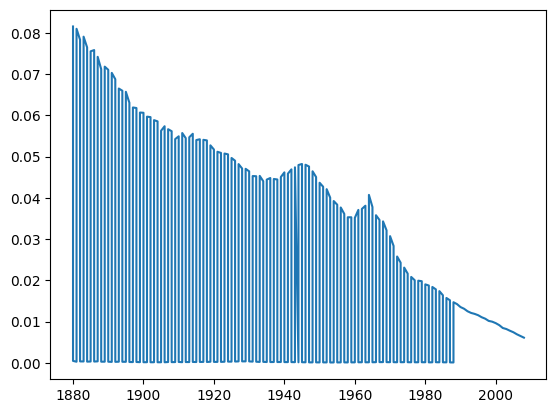

In [97]:
data = bnames[bnames['name'] == 'John']
#print(data)
#plt.plot(data['year'], data['prop'])

#data is not sorted
data = data.sort_values(by=['year'])
#print(data)
plt.plot(data['year'], data['prop'])

The plots look funny... what's going on?

### Practice with pandas functions

1. In which year was your name (or a similar one) most popular? Least popular?
2. Reorder the data frame containing the name of your choice from highest to lowest popularity
3. On the data frame containing the name of your choice, add a new column that gives the number of babies per thousand.

## Combining datasets

In [98]:
instr = pd.DataFrame({
    "name": ["John", "Paul", "George", "Ringo", "Stuart", "Pete"],
    "instrument": ["guitar", "bass", "guitar", "drums", "bass", "drums"]
})
people = pd.DataFrame({
    "name": ["John", "Paul", "George", "Ringo", "Brian"],
    "band": [True, True, True, True, False]
})

Try all the different joins

In [99]:
left_join = instr.merge(people, how="left")
right_join = instr.merge(people, how="right")
inner_join = instr.merge(people, how="inner")
full_join = instr.merge(people, how="outer")

print(left_join)
print(right_join)
print(inner_join)
print(full_join)

     name instrument  band
0    John     guitar  True
1    Paul       bass  True
2  George     guitar  True
3   Ringo      drums  True
4  Stuart       bass   NaN
5    Pete      drums   NaN
     name instrument   band
0    John     guitar   True
1    Paul       bass   True
2  George     guitar   True
3   Ringo      drums   True
4   Brian        NaN  False
     name instrument  band
0    John     guitar  True
1    Paul       bass  True
2  George     guitar  True
3   Ringo      drums  True
     name instrument   band
0   Brian        NaN  False
1  George     guitar   True
2    John     guitar   True
3    Paul       bass   True
4    Pete      drums    NaN
5   Ringo      drums   True
6  Stuart       bass    NaN


In [100]:
people["instrument"] = ["vocals", "vocals", "backup", "backup", "manager"]

How would you combine `instr` and `people` now that `people` has this additional column?

In [101]:
full_join_wrong = instr.merge(people, how="outer")
print(full_join_wrong)

      name instrument   band
0    Brian    manager  False
1   George     backup   True
2   George     guitar    NaN
3     John     guitar    NaN
4     John     vocals   True
5     Paul       bass    NaN
6     Paul     vocals   True
7     Pete      drums    NaN
8    Ringo     backup   True
9    Ringo      drums    NaN
10  Stuart       bass    NaN


In [102]:
full_join_updated = instr.merge(people, on="name", how="outer")
print(full_join_updated)

     name instrument_x   band instrument_y
0   Brian          NaN  False      manager
1  George       guitar   True       backup
2    John       guitar   True       vocals
3    Paul         bass   True       vocals
4    Pete        drums    NaN          NaN
5   Ringo        drums   True       backup
6  Stuart         bass    NaN          NaN


### Exercise

Read the "births.csv" file attached to this lab.

Convert from proportions of baby names to absolute numbers by combining `bnames` with this new data set, and then performing the proper calculation.

Compute how many people with each name were born over all years.

Repeat the above, this time using `soundex` instead of `name`, thus answering the question: what is the most common sound? Then find out what name it corresponds to (hint: use another join).

In [110]:
births = pd.read_csv("births.csv")
bnames = pd.read_csv("bnames.csv")
#print(births.head())
#print(bnames.head())

births_join = births.merge(bnames, on=['year', 'sex'], how='outer')
print(births_join)

        year   sex   births     name  prop soundex
0       1880   boy   118405     John  0.08    J500
1       1880   boy   118405  William  0.08    W450
2       1880   boy   118405    James  0.05    J520
3       1880   boy   118405  Charles  0.05    C642
4       1880   boy   118405   George  0.04    G620
...      ...   ...      ...      ...   ...     ...
257997  2008  girl  2072756   Kenley  0.00    K540
257998  2008  girl  2072756   Sloane  0.00    S450
257999  2008  girl  2072756  Elianna  0.00    E450
258000  2009   boy  2095910      NaN   NaN     NaN
258001  2009  girl  2001968      NaN   NaN     NaN

[258002 rows x 6 columns]
